## Package loading

In [14]:
#Packages Used
import gym
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from hiive.mdptoolbox.example import forest
import seaborn as sns
from hiive.mdptoolbox.mdp import PolicyIteration, ValueIteration, QLearning, PolicyIterationModified

In [31]:
num_state = 1000
reward1 = 4
reward2 = 2
fire_probability = 0.1
P_600, R_600 = forest(S=num_state, r1=reward1, r2=reward2, p=0.1)

## Different discounts

/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will r

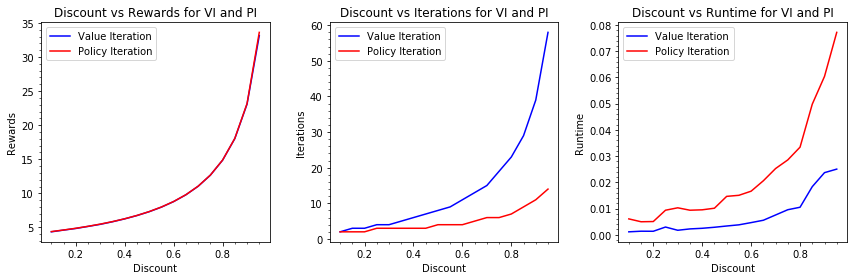

In [32]:
vi_results = []
pi_results = []

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4));

discounts = np.arange(0.1, 0.9999, 0.05)

for disc in discounts:
    vi = ValueIteration(P_600, R_600, disc)
    vi.run()
    runtime = vi.time
    rewards = np.amax(vi.V)    
    iterations = vi.iter
    vi_results.append(['VI', num_state, disc, runtime, rewards, iterations])


    pi = PolicyIterationModified(P_600, R_600, disc)
    pi.run()
    runtime = pi.time
    rewards = np.amax(pi.V)    
    iterations = pi.iter
    pi_results.append(['PI', num_state, disc, runtime, rewards, iterations])

df_vi = pd.DataFrame(vi_results, columns=['Algorithm', 'Size', 'Discount',  'Runtime', 'Rewards',  'Iterations'])
df_pi = pd.DataFrame(pi_results, columns=['Algorithm', 'Size', 'Discount',  'Runtime', 'Rewards',  'Iterations'])


### plotting 


sns.lineplot(df_vi['Discount'], df_vi['Rewards'], linestyle='-', label = "Value Iteration", ax=axs[0], alpha=1, color='blue')
sns.lineplot(df_pi['Discount'], df_pi['Rewards'], linestyle='-', label = "Policy Iteration", ax=axs[0], alpha=1, color='red')
axs[0].set_title('Discount vs Rewards for VI and PI')


sns.lineplot(df_vi['Discount'], df_vi['Iterations'], linestyle='-', label = "Value Iteration", ax=axs[1], alpha=1, color='blue')
sns.lineplot(df_pi['Discount'], df_pi['Iterations'], linestyle='-', label = "Policy Iteration", ax=axs[1], alpha=1, color='red')
axs[1].set_title('Discount vs Iterations for VI and PI')

sns.lineplot(df_vi['Discount'], df_vi['Runtime'], linestyle='-', label = "Value Iteration", ax=axs[2], alpha=1, color='blue')
sns.lineplot(df_pi['Discount'], df_pi['Runtime'], linestyle='-', label = "Policy Iteration", ax=axs[2], alpha=1, color='red')
axs[2].set_title('Discount vs Runtime for VI and PI')


for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()

fig.tight_layout()

/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will r

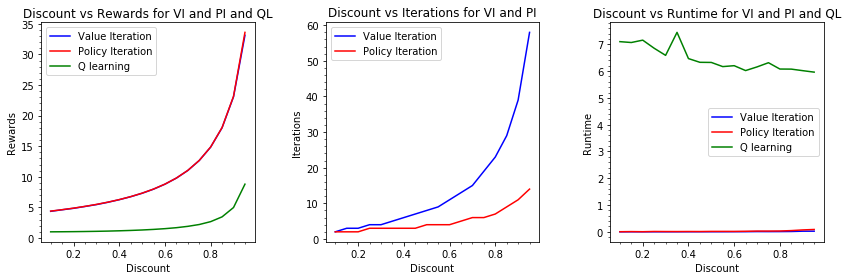

In [46]:
vi_results = []
pi_results = []
ql_results = []

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4));

discounts = np.arange(0.1, 0.9999, 0.05)

for disc in discounts:
    vi = ValueIteration(P_600, R_600, disc)
    vi.run()
    runtime = vi.time
    rewards = np.amax(vi.V)    
    iterations = vi.iter
    vi_results.append(['VI', num_state, disc, runtime, rewards, iterations])


    pi = PolicyIterationModified(P_600, R_600, disc)
    pi.run()
    runtime = pi.time
    rewards = np.amax(pi.V)    
    iterations = pi.iter
    pi_results.append(['PI', num_state, disc, runtime, rewards, iterations])
    
    ql = QLearning(P_600, R_600, disc, n_iter=100000)
    ql.run()
    runtime = ql.time
    rewards = np.amax(ql.V)
    iterations = 100000
    ql_results.append(['QL', num_state, disc, runtime, rewards, 100000])
    
df_vi = pd.DataFrame(vi_results, columns=['Algorithm', 'Size', 'Discount',  'Runtime', 'Rewards',  'Iterations'])
df_pi = pd.DataFrame(pi_results, columns=['Algorithm', 'Size', 'Discount',  'Runtime', 'Rewards',  'Iterations'])
df_ql = pd.DataFrame(ql_results, columns=['Algorithm', 'Size', 'Discount',  'Runtime', 'Rewards',  'Iterations'])

### plotting 


sns.lineplot(df_vi['Discount'], df_vi['Rewards'], linestyle='-', label = "Value Iteration", ax=axs[0], alpha=1, color='blue')
sns.lineplot(df_pi['Discount'], df_pi['Rewards'], linestyle='-', label = "Policy Iteration", ax=axs[0], alpha=1, color='red')
sns.lineplot(df_ql['Discount'], df_ql['Rewards'], linestyle='-', label = "Q learning", ax=axs[0], alpha=1, color='green')
axs[0].set_title('Discount vs Rewards for VI and PI and QL')


sns.lineplot(df_vi['Discount'], df_vi['Iterations'], linestyle='-', label = "Value Iteration", ax=axs[1], alpha=1, color='blue')
sns.lineplot(df_pi['Discount'], df_pi['Iterations'], linestyle='-', label = "Policy Iteration", ax=axs[1], alpha=1, color='red')
axs[1].set_title('Discount vs Iterations for VI and PI')

sns.lineplot(df_vi['Discount'], df_vi['Runtime'], linestyle='-', label = "Value Iteration", ax=axs[2], alpha=1, color='blue')
sns.lineplot(df_pi['Discount'], df_pi['Runtime'], linestyle='-', label = "Policy Iteration", ax=axs[2], alpha=1, color='red')
sns.lineplot(df_ql['Discount'], df_ql['Runtime'], linestyle='-', label = "Q learning", ax=axs[2], alpha=1, color='green')
axs[2].set_title('Discount vs Runtime for VI and PI and QL')


for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()

fig.tight_layout()



## Different epsilons 

/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will r

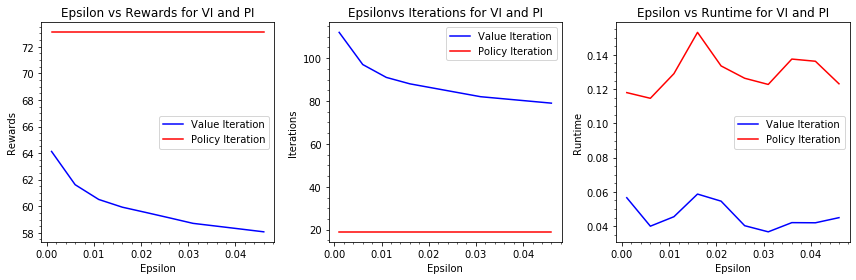

In [50]:
vi_results = []
pi_results = []

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
disc = 0.99
epsilons = np.arange(0.001,0.05, 0.005)

for ep in epsilons:
    vi = ValueIteration(P_600, R_600, disc, epsilon = ep)
    vi.run()
    runtime = vi.time
    rewards = np.amax(vi.V)    
    iterations = vi.iter
    vi_results.append(['VI', num_state, ep, runtime, rewards, iterations])


    pi = PolicyIterationModified(P_600, R_600, disc, epsilon = ep)
    pi.run()
    runtime = pi.time
    rewards = np.amax(pi.V)    
    iterations = pi.iter
    pi_results.append(['PI', num_state, ep, runtime, rewards, iterations])
    
    

df_vi = pd.DataFrame(vi_results, columns=['Algorithm', 'Size', 'Epsilon',  'Runtime', 'Rewards',  'Iterations'])
df_pi = pd.DataFrame(pi_results, columns=['Algorithm', 'Size', 'Epsilon',  'Runtime', 'Rewards',  'Iterations'])



### plotting 


sns.lineplot(df_vi['Epsilon'], df_vi['Rewards'], linestyle='-', label = "Value Iteration", ax=axs[0], alpha=1, color='blue')
sns.lineplot(df_pi['Epsilon'], df_pi['Rewards'], linestyle='-', label = "Policy Iteration", ax=axs[0], alpha=1, color='red')
axs[0].set_title('Epsilon vs Rewards for VI and PI')


sns.lineplot(df_vi['Epsilon'], df_vi['Iterations'], linestyle='-', label = "Value Iteration", ax=axs[1], alpha=1, color='blue')
sns.lineplot(df_pi['Epsilon'], df_pi['Iterations'], linestyle='-', label = "Policy Iteration", ax=axs[1], alpha=1, color='red')
axs[1].set_title('Epsilonvs Iterations for VI and PI')

sns.lineplot(df_vi['Epsilon'], df_vi['Runtime'], linestyle='-', label = "Value Iteration", ax=axs[2], alpha=1, color='blue')
sns.lineplot(df_pi['Epsilon'], df_pi['Runtime'], linestyle='-', label = "Policy Iteration", ax=axs[2], alpha=1, color='red')
axs[2].set_title('Epsilon vs Runtime for VI and PI')


for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()

fig.tight_layout()

## Size of the states using the optimum parameters

In [53]:
vi_results = []
pi_results = []

sizes = range(5, 1000, 10)
disc = 0.99
ep = 0.001
for size in sizes:
    P, R = forest(S = size, r1=reward1, r2=reward2, p=0.1)            
    vi = ValueIteration(P, R, disc, epsilon = ep)
    vi.run()
    runtime = vi.time
    rewards = np.amax(vi.V)    
    iterations = vi.iter
    vi_results.append(['VI', size, disc, runtime, rewards, iterations])        

    pi = PolicyIterationModified(P, R, disc, epsilon = ep)
    pi.run()
    runtime = pi.time
    rewards = np.amax(pi.V)    
    iterations = pi.iter
    pi_results.append(['PI', size, disc, runtime, rewards, iterations])     
    
    ql = QLearning(P, R, disc, epsilon = ep, n_iter=100000)
    ql.run()
    runtime = ql.time
    rewards = np.amax(ql.V)
    iterations = 100000
    ql_results.append(['QL', size, disc, runtime, rewards, 100000])

vi_df = pd.DataFrame(vi_results, columns=['Algorithm', 'Size', 'Discount', 'Runtime', 'Rewards', 'Iterations'])
pi_df = pd.DataFrame(pi_results, columns=['Algorithm', 'Size', 'Discount', 'Runtime', 'Rewards', 'Iterations'])
df_ql = pd.DataFrame(ql_results, columns=['Algorithm', 'Size', 'Discount',  'Runtime', 'Rewards',  'Iterations'])


/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will r

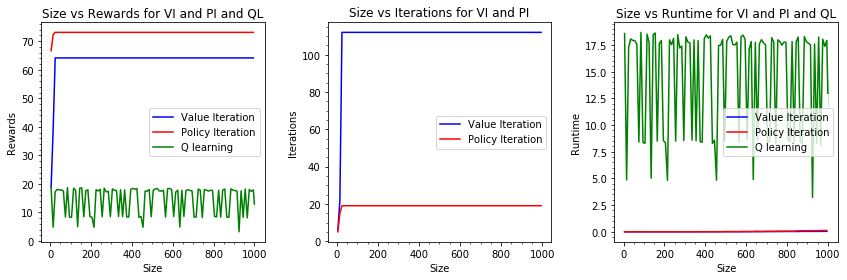

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4));

sns.lineplot(vi_df['Size'], vi_df['Rewards'], linestyle='-', label = "Value Iteration", ax=axs[0], alpha=1, color='blue')
sns.lineplot(pi_df['Size'], pi_df['Rewards'], linestyle='-', label = "Policy Iteration", ax=axs[0], alpha=1, color='red')
sns.lineplot(df_ql['Size'], df_ql['Rewards'], linestyle='-', label = "Q learning", ax=axs[0], alpha=1, color='green')

axs[0].set_title('Size vs Rewards for VI and PI and QL')


sns.lineplot(vi_df['Size'], vi_df['Iterations'], linestyle='-', label = "Value Iteration", ax=axs[1], alpha=1, color='blue')
sns.lineplot(pi_df['Size'], pi_df['Iterations'], linestyle='-', label = "Policy Iteration", ax=axs[1], alpha=1, color='red')
axs[1].set_title('Size vs Iterations for VI and PI')

sns.lineplot(vi_df['Size'], vi_df['Runtime'], linestyle='-', label = "Value Iteration", ax=axs[2], alpha=1, color='blue')
sns.lineplot(pi_df['Size'], pi_df['Runtime'], linestyle='-', label = "Policy Iteration", ax=axs[2], alpha=1, color='red')
sns.lineplot(df_ql['Size'], df_ql['Rewards'], linestyle='-', label = "Q learning", ax=axs[2], alpha=1, color='green')

axs[2].set_title('Size vs Runtime for VI and PI and QL')


for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()

fig.tight_layout()
fig.show()

## Q learning on the size of 1000

/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/hung-hsilin/miniconda3/envs/CS6476/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


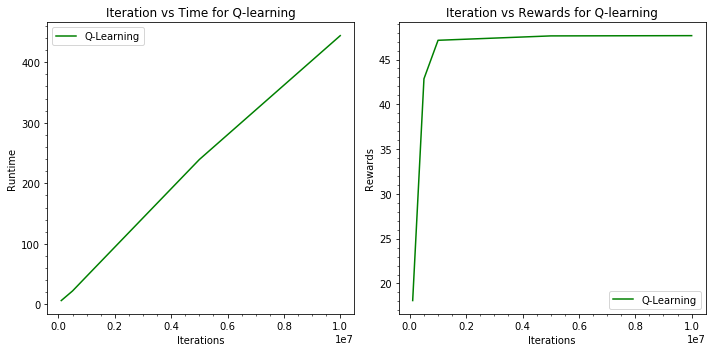

In [58]:
# num_state = 1000
# reward1 = 4
# reward2 = 2
# fire_probability = 0.1
# P_1000, R_1000 = forest(S=num_state, r1=reward1, r2=reward2, p=0.1)

# ql_results = []

# disc = 0.99
# iteration_list = [1e5, 5e5, 1e6, 5e6, 1e7] 

# for itr in iteration_list:
#     ql = QLearning(P_1000, R_1000, disc, n_iter=itr)
#     ql.run()
#     runtime = ql.time
#     rewards = np.amax(ql.V)    
#     ql_results.append(['QL', num_state, itr, runtime, rewards])

# df_ql = pd.DataFrame(ql_results, columns=['Algorithm', 'Size', 'Iterations',  'Runtime', 'Rewards'])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5));
sns.lineplot(df_ql['Iterations'], df_ql['Runtime'], linestyle='-', label = "Q-Learning", ax=axs[0], alpha=1, color='green')
axs[0].set_title('Iteration vs Time for Q-learning')

sns.lineplot(df_ql['Iterations'], df_ql['Rewards'], linestyle='-', label = "Q-Learning", ax=axs[1], alpha=1, color='green')
axs[1].set_title('Iteration vs Rewards for Q-learning')

for ax in axs.flat:
    ax.legend(loc='best')
    ax.minorticks_on()
fig.tight_layout()